Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar as cal
import datetime

Import Data

In [3]:
customer = pd.read_csv('/content/Case Study - Customer.csv', delimiter = ';')
product = pd.read_csv('/content/Case Study - Product.csv', delimiter = ';')
store = pd.read_csv('/content/Case Study - Store.csv', delimiter = ';')
transaction = pd.read_csv('/content/Case Study - Transaction.csv', delimiter = ';')

Data Cleaning

In [4]:
print(customer.isna().sum())
print("")
print(product.isna().sum())
print("")
print(store.isna().sum())
print("")
print(transaction.isna().sum())

CustomerID        0
Age               0
Gender            0
Marital Status    3
Income            0
dtype: int64

ProductID       0
Product Name    0
Price           0
dtype: int64

StoreID       0
StoreName     0
GroupStore    0
Type          0
Latitude      0
Longitude     0
dtype: int64

TransactionID    0
CustomerID       0
Date             0
ProductID        0
Price            0
Qty              0
TotalAmount      0
StoreID          0
dtype: int64


In [5]:
customer = customer.fillna(method='ffill')

In [6]:
print(customer.isna().sum())

CustomerID        0
Age               0
Gender            0
Marital Status    0
Income            0
dtype: int64


In [7]:
customer['Income'] = customer['Income'].str.replace(',', '.')
customer['Income'] = customer['Income'].astype(float)

In [8]:
store['Longitude'] = store['Longitude'].str.replace(',', '.')
store['Longitude'] = store['Longitude'].astype(float)
store['Latitude'] = store['Latitude'].str.replace(',', '.')
store['Latitude'] = store['Latitude'].astype(float)
store.head()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,-6.200000,106.816666
1,2,Prima Kelapa Dua,Prima,Modern Trade,-6.914864,107.608238
2,3,Prima Kota,Prima,Modern Trade,-7.797068,110.370529
3,4,Gita Ginara,Gita,General Trade,-6.966667,110.416664
4,5,Bonafid,Gita,General Trade,-7.250445,112.768845


In [9]:
transaction['Date'] = pd.to_datetime(transaction['Date'], format='%d/%m/%Y')

Merging Data (Time Series)

In [10]:
data_time_series = pd.merge(left = transaction,
                  right = customer,
                  left_on = 'CustomerID',
                  right_on = 'CustomerID',
                  how = 'left')

In [11]:
data_time_series = pd.merge(left = data_time_series,
                  right = product,
                  left_on = ['ProductID', 'Price'],
                  right_on = ['ProductID', 'Price'],
                  how = 'left')

In [12]:
data_time_series = pd.merge(left = data_time_series,
            right = store,
            left_on = 'StoreID',
            right_on = 'StoreID',
            how = 'left')

In [13]:
data_time_series = data_time_series.drop_duplicates()
data_time_series.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   TransactionID   5020 non-null   object        
 1   CustomerID      5020 non-null   int64         
 2   Date            5020 non-null   datetime64[ns]
 3   ProductID       5020 non-null   object        
 4   Price           5020 non-null   int64         
 5   Qty             5020 non-null   int64         
 6   TotalAmount     5020 non-null   int64         
 7   StoreID         5020 non-null   int64         
 8   Age             5020 non-null   int64         
 9   Gender          5020 non-null   int64         
 10  Marital Status  5020 non-null   object        
 11  Income          5020 non-null   float64       
 12  Product Name    5020 non-null   object        
 13  StoreName       5020 non-null   object        
 14  GroupStore      5020 non-null   object        
 15  Type

In [14]:
data_time_series.rename(columns = {"Product Name": "ProductName", "Marital Status": "MaritalStatus"}, inplace = True)
data_time_series.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,MaritalStatus,Income,ProductName,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.53,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
1,TR16356,165,2022-01-01,P9,10000,7,70000,1,44,1,Married,14.58,Yoghurt,Prima Tendean,Prima,Modern Trade,-6.200000,106.816666
2,TR1984,183,2022-01-01,P1,8800,4,35200,4,27,1,Single,0.18,Choco Bar,Gita Ginara,Gita,General Trade,-6.966667,110.416664
3,TR35256,160,2022-01-01,P1,8800,7,61600,4,48,1,Married,12.57,Choco Bar,Gita Ginara,Gita,General Trade,-6.966667,110.416664
4,TR41231,386,2022-01-01,P9,10000,1,10000,4,33,0,Married,6.95,Yoghurt,Gita Ginara,Gita,General Trade,-6.966667,110.416664


Exploratory Data Analysis

In [15]:
data_time_series['month'] = data_time_series['Date'].dt.month

In [16]:
# Qty dari per Bulan
data_time_series.groupby('month').agg({'Qty':'sum'})

,Qty
month,
1,1560
2,1441
3,1753
4,1554
5,1589
6,1592
7,1532
8,1492
9,1499


In [17]:
# TotalAmount dari Hari ke Hari
data_time_series.groupby('Date').agg({'TotalAmount':'sum'})

,TotalAmount
Date,
2022-01-01,431200
2022-01-02,613600
2022-01-03,561300
2022-01-04,396500
2022-01-05,273400
...,...
2022-12-27,647300
2022-12-28,599000
2022-12-29,437900


In [18]:
# Jumlah Qty by Product
data_time_series.groupby('ProductName').agg({'Qty':'sum'})

,Qty
ProductName,
Cashew,627
Cheese Stick,1841
Choco Bar,2408
Coffee Candy,2097
Crackers,1824
Ginger Candy,2626
Oat,965
Potato Chip,1092
Thai Tea,2853


In [19]:
# Jumlah TotalAmount berdasarkan StoreName
data_time_series.groupby('StoreName').agg({'TotalAmount':'sum'})

,TotalAmount
StoreName,
Bonafid,11595600
Buana,11332000
Buana Indah,10629900
Gita Ginara,11116100
Harapan Baru,11329500
Lingga,25294100
Prestasi Utama,12285200
Priangan,10995100
Prima Kelapa Dua,12136300


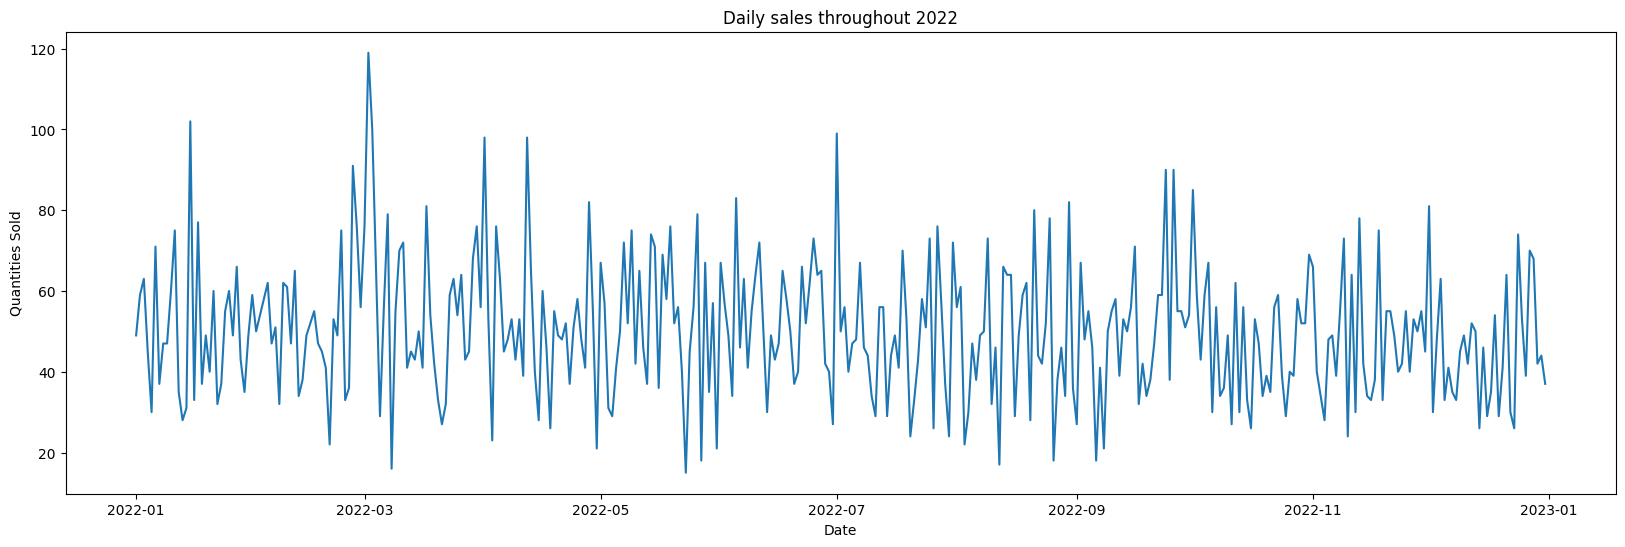

In [20]:
plt.figure(figsize=(20, 6))
plt.plot(data_time_series.groupby('Date').agg({'Qty':'sum'})['Qty'])
plt.xlabel('Date')
plt.ylabel('Quantities Sold')
plt.title('Daily sales throughout 2022')
plt.show()

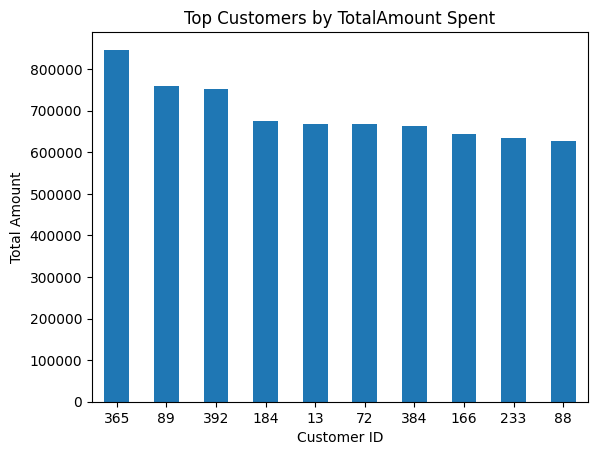

In [21]:
top_customers = data_time_series.groupby('CustomerID')['TotalAmount'].sum().sort_values(ascending=False)[:10]
top_customers.plot(kind='bar')
plt.xlabel('Customer ID')
plt.ylabel('Total Amount')
plt.title('Top Customers by TotalAmount Spent')
plt.xticks(rotation=0)
plt.show()

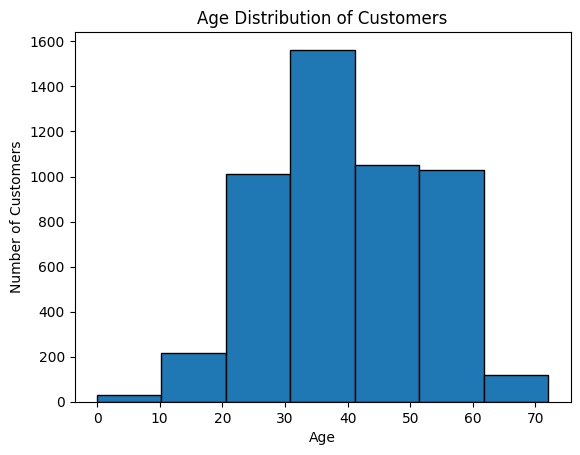

In [22]:
plt.hist(data_time_series['Age'], bins = 7, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title('Age Distribution of Customers')
plt.show()

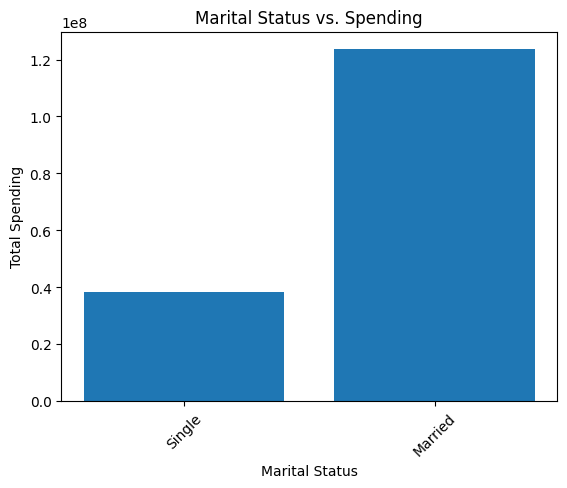

In [23]:
marital_spending = data_time_series.groupby('MaritalStatus')['TotalAmount'].sum().sort_values(ascending = True)
plt.bar(marital_spending.index, marital_spending.values)
plt.xlabel('Marital Status')
plt.ylabel('Total Spending')
plt.title('Marital Status vs. Spending')
plt.xticks(rotation=45)
plt.show()

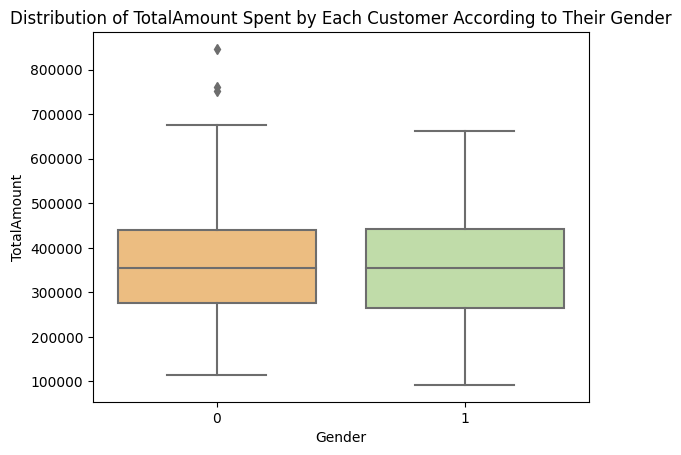

In [24]:
data_1 = data_time_series.groupby('CustomerID').agg({'TotalAmount':'sum', 'Qty':'sum'})
data_2 = pd.merge(left = data_1,
                  right = customer,
                  left_on = 'CustomerID',
                  right_on = 'CustomerID',
                  how = 'right')
sns.boxplot(x = "Gender", y = "TotalAmount", data = data_2, palette = 'Spectral')
plt.xlabel("Gender")
plt.ylabel("TotalAmount")
plt.title("Distribution of TotalAmount Spent by Each Customer According to Their Gender")
plt.show()

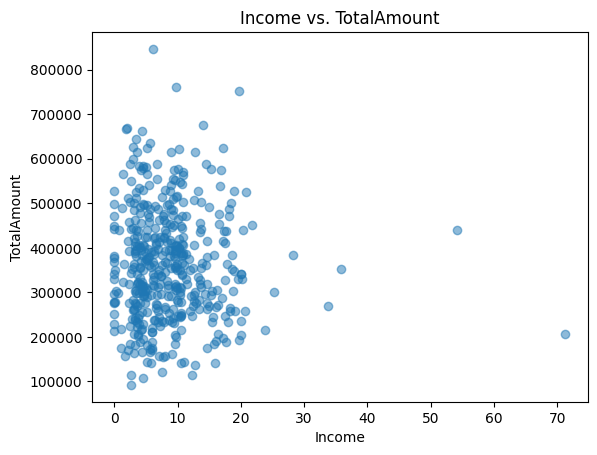

In [25]:
data_1 = data_time_series.groupby('CustomerID').agg({'TotalAmount':'sum', 'Qty':'sum'})
data_2 = pd.merge(left = data_1,
                  right = customer,
                  left_on = 'CustomerID',
                  right_on = 'CustomerID',
                  how = 'right')
plt.scatter(data_2['Income'], data_2['TotalAmount'], alpha=0.5)
plt.xlabel('Income')
plt.ylabel('TotalAmount')
plt.title('Income vs. TotalAmount')
plt.show()

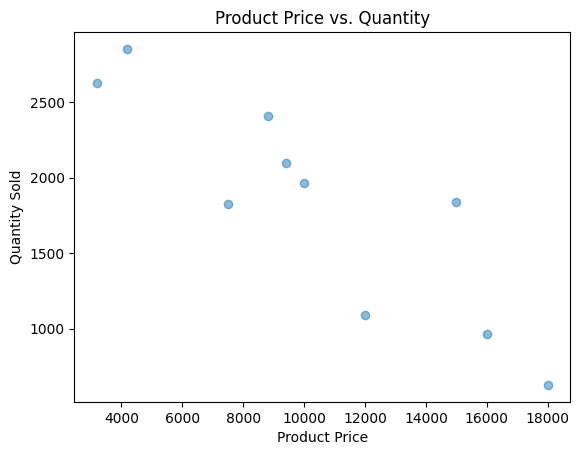

In [26]:
data_1 = data_time_series.groupby('ProductID').agg({'Qty':'sum'})
data_2 = pd.merge(left = data_1,
                  right = product,
                  left_on = 'ProductID',
                  right_on = 'ProductID',
                  how = 'left')
plt.scatter(data_2['Price'], data_2['Qty'], alpha=0.5)
plt.xlabel('Product Price')
plt.ylabel('Quantity Sold')
plt.title('Product Price vs. Quantity')
plt.show()

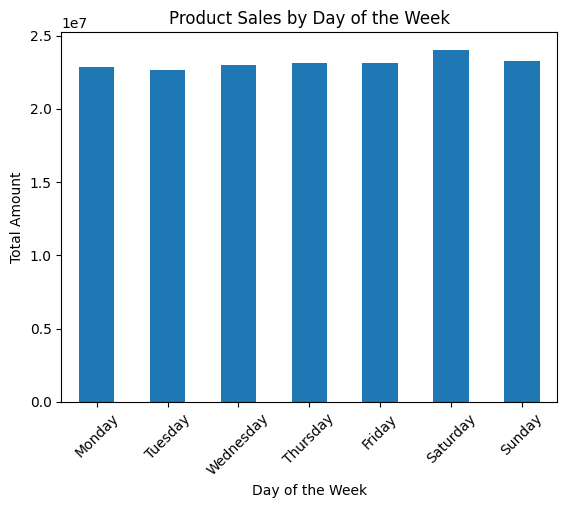

In [27]:
data_time_series['DayOfWeek'] = data_time_series['Date'].dt.day_name()
day_sales = data_time_series.groupby('DayOfWeek')['TotalAmount'].sum()
day_sales = day_sales.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
day_sales.plot(kind='bar')
plt.xlabel('Day of the Week')
plt.ylabel('Total Amount')
plt.title('Product Sales by Day of the Week')
plt.xticks(rotation=45)
plt.show()

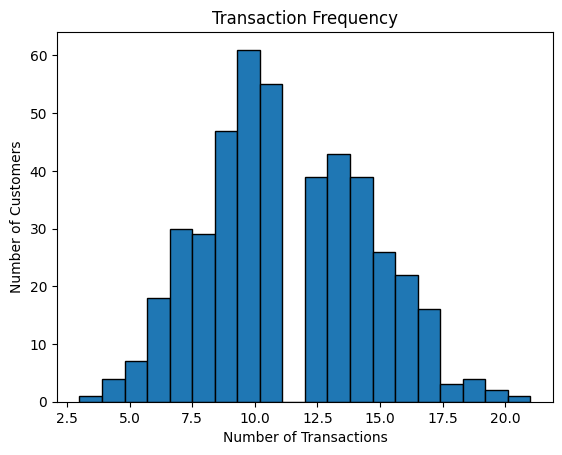

In [28]:
transaction_counts = data_time_series['CustomerID'].value_counts()
plt.hist(transaction_counts, bins=20, edgecolor='black')
plt.xlabel('Number of Transactions')
plt.ylabel('Number of Customers')
plt.title('Transaction Frequency')
plt.show()

<ipython-input-29-519e1fe752ec>:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


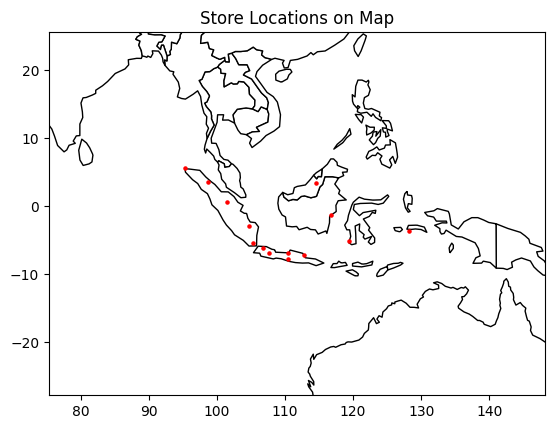

In [29]:
import geopandas as gpd
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(store['Longitude'], store['Latitude'])]
gdf = gpd.GeoDataFrame(store, geometry=geometry)

latitude_range = (min(store['Latitude']) - 20, max(store['Latitude']) + 20)
longitude_range = (min(store['Longitude']) - 20, max(store['Longitude']) + 20)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
base = world.plot(color='white', edgecolor='black')
gdf.plot(ax=base, marker='o', color='red', markersize=5)

plt.title('Store Locations on Map')
plt.xlim(longitude_range)
plt.ylim(latitude_range)
plt.show()

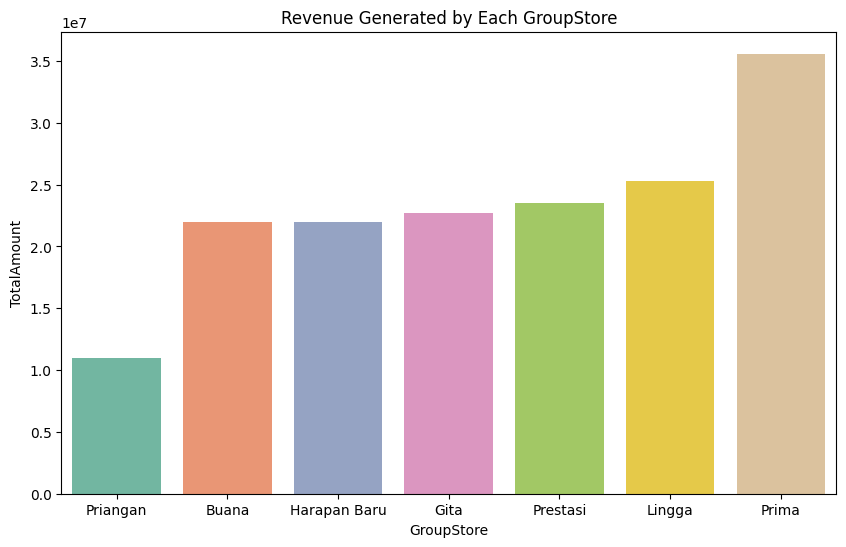

In [30]:
data_1 = data_time_series.groupby('GroupStore').agg({'TotalAmount':'sum', 'Qty':'sum'})
data_2 = pd.merge(left = data_1,
                  right = store,
                  left_on = 'GroupStore',
                  right_on = 'GroupStore',
                  how = 'left')
data_2 = data_2.sort_values('TotalAmount')
plt.figure(figsize = (10, 6))
sns.barplot(x = "GroupStore", y = "TotalAmount", data = data_2, palette = 'Set2')
plt.xlabel("GroupStore")
plt.ylabel("TotalAmount")
plt.title("Revenue Generated by Each GroupStore")
plt.show()

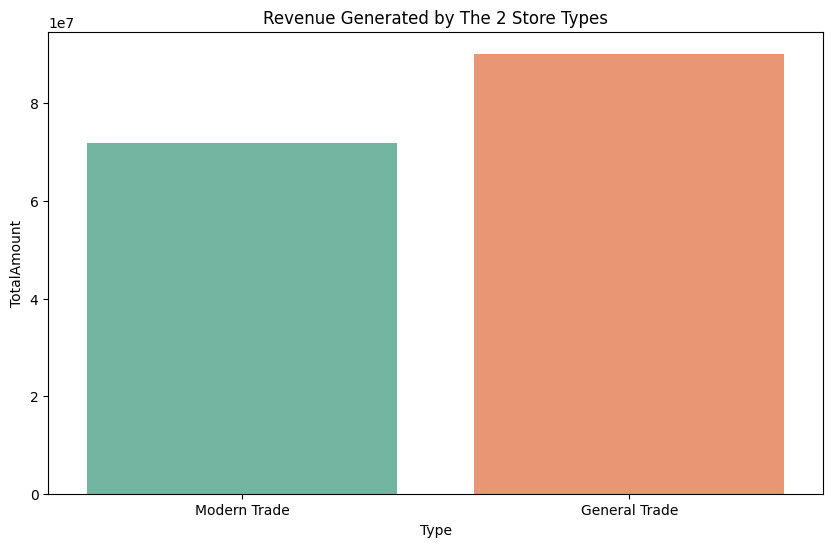

In [31]:
data_1 = data_time_series.groupby('Type').agg({'TotalAmount':'sum', 'Qty':'sum'})
data_2 = pd.merge(left = data_1,
                  right = store,
                  left_on = 'Type',
                  right_on = 'Type',
                  how = 'left')
data_2 = data_2.sort_values('TotalAmount')
plt.figure(figsize = (10, 6))
sns.barplot(x = "Type", y = "TotalAmount", data = data_2, palette = 'Set2')
plt.xlabel("Type")
plt.ylabel("TotalAmount")
plt.title("Revenue Generated by The 2 Store Types")
plt.show()

<ipython-input-32-109e37a89dca>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = data_time_series.corr()[['Qty']].sort_values(by = ['Qty'], ascending = False)


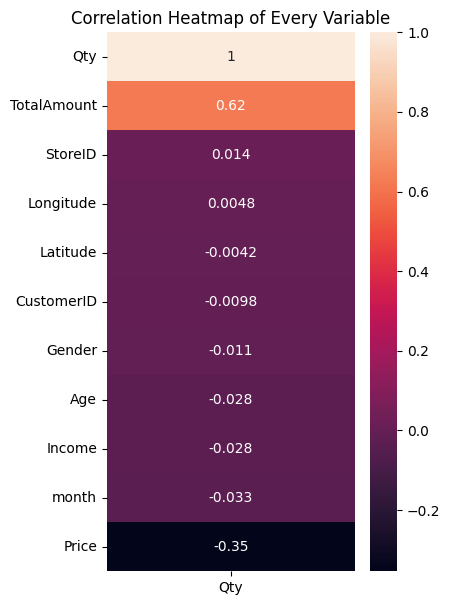

In [32]:
df_corr = data_time_series.corr()[['Qty']].sort_values(by = ['Qty'], ascending = False)
plt.figure(figsize = (4, 7))
sns.heatmap(df_corr, annot = True)
plt.title('Correlation Heatmap of Every Variable')
plt.show()

TIME SERIES

In [33]:
df = data_time_series.copy()

Data Aggregating (Time Series)

In [34]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
data_qty = df.groupby('Date').agg({'Qty':'sum'})

Check for Stationarity

In [35]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF: ", dftest[0])
  print("2. P-Value: ", dftest[1])
  print("3. Num of Lags: ", dftest[2])
  print("4. Num of Observations Used for ADF Regression and Critical Values Calculation: ", dftest[3])
  print("5. Critical Values: ")
  for key, val in dftest[4].items():
    print("\t", key, ": ", val)

In [36]:
ad_test(data_qty['Qty'])

1. ADF:  -19.448086319449082
2. P-Value:  0.0
3. Num of Lags:  0
4. Num of Observations Used for ADF Regression and Critical Values Calculation:  364
5. Critical Values: 
	 1% :  -3.4484434475193777
	 5% :  -2.869513170510808
	 10% :  -2.571017574266393


Check for Seasonality

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm

Look for Parameters' Values (p, d, q)

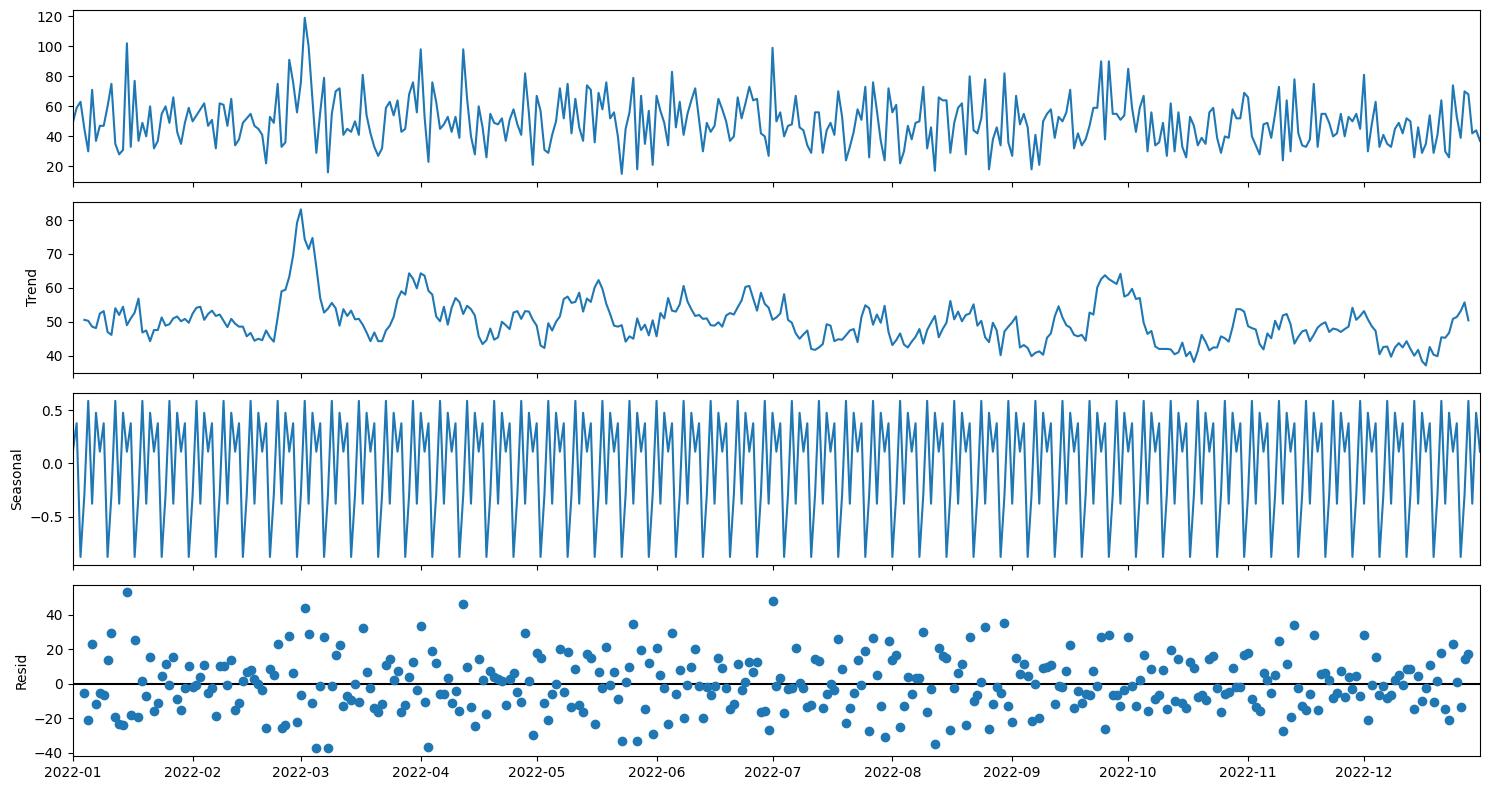

In [41]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
decomposition = sm.tsa.seasonal_decompose(data_qty, model='additive')
fig = decomposition.plot()
plt.show()

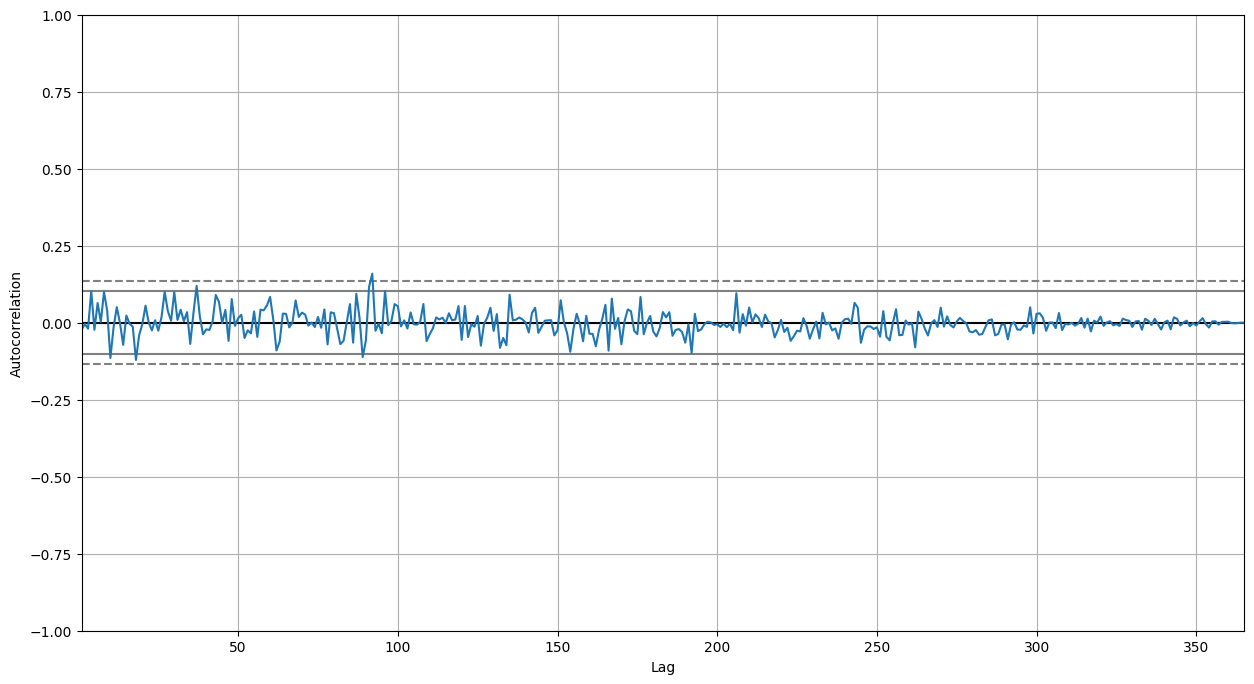

In [42]:
# Look for the value of p using autocorrelation
pd.plotting.autocorrelation_plot(data_qty['Qty'])
plt.show()
# Beacuse the plot intersect 4 lines, therefore p = 4

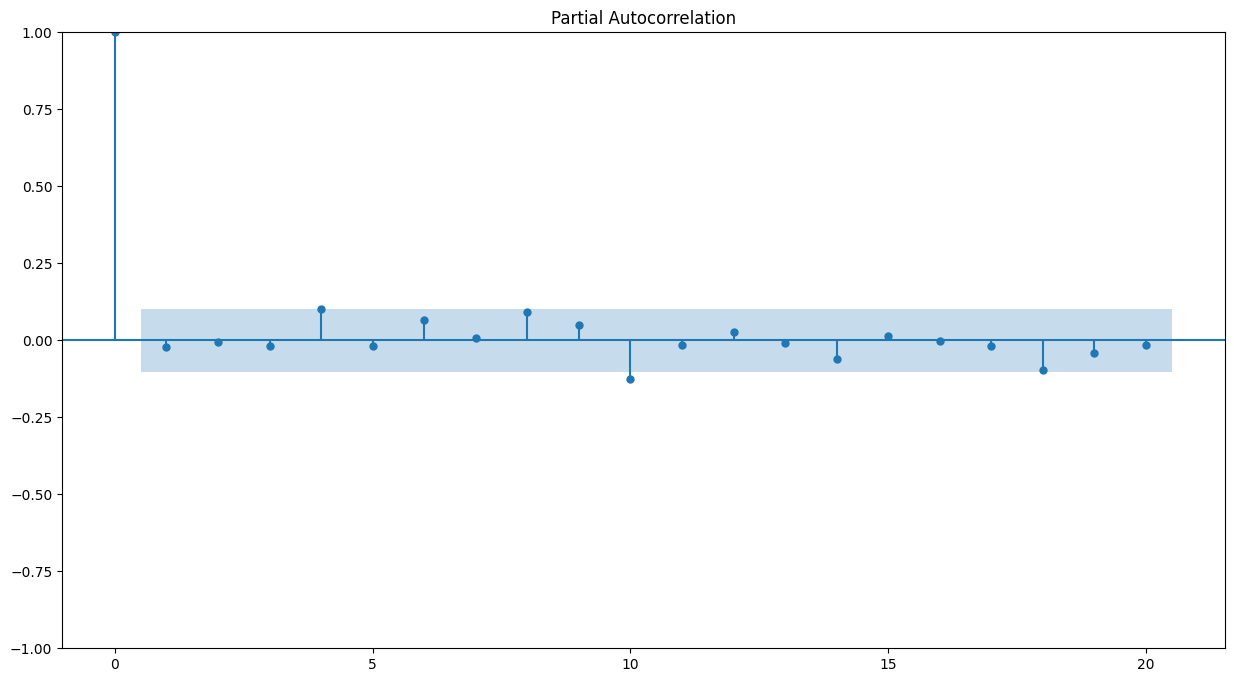

In [43]:
# Look for q with plot_pacf
plot_pacf(data_qty['Qty'], lags = 20)
plt.show()
# There's only 1 point that is close to 1 in the y axis. Therefore, q = 1

Split Data

In [44]:
train = data_qty.iloc[:-31]
test = data_qty.iloc[-31:]

Model Fitting

In [45]:
import statsmodels.api as sm

In [46]:
from statsmodels.tools.sm_exceptions import ConvergenceWarning
import warnings
warnings.simplefilter('ignore', ConvergenceWarning)
model = sm.tsa.statespace.SARIMAX(train['Qty'], order = (4, 1, 1), seasonal_order = (4, 1, 1, 11))
model = model.fit()
print(model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                                Qty   No. Observations:                  334
Model:             SARIMAX(4, 1, 1)x(4, 1, 1, 11)   Log Likelihood               -1383.712
Date:                            Sat, 19 Aug 2023   AIC                           2789.424
Time:                                    07:06:38   BIC                           2830.944
Sample:                                01-01-2022   HQIC                          2806.000
                                     - 11-30-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0215      0.058     -0.374      0.708      -0.134       0.091
ar.L2         -0.0068      0.055   

Predicting Testing Data

In [47]:
# Predict the value of test data
predictions = model.predict(len(train), len(train) + 30)
print(predictions)

2022-12-01    47.758809
2022-12-02    52.165488
2022-12-03    44.569728
2022-12-04    46.329366
2022-12-05    42.407671
2022-12-06    50.233067
2022-12-07    47.408852
2022-12-08    42.990533
2022-12-09    46.801609
2022-12-10    52.067918
2022-12-11    44.293471
2022-12-12    46.999694
2022-12-13    53.414688
2022-12-14    45.814932
2022-12-15    48.262529
2022-12-16    40.554933
2022-12-17    48.766073
2022-12-18    46.089192
2022-12-19    44.226314
2022-12-20    47.307036
2022-12-21    50.881905
2022-12-22    44.647698
2022-12-23    48.422540
2022-12-24    50.892513
2022-12-25    45.979781
2022-12-26    46.071440
2022-12-27    43.268083
2022-12-28    48.486397
2022-12-29    45.817628
2022-12-30    42.739007
2022-12-31    46.215788
Freq: D, Name: predicted_mean, dtype: float64


Plotting Testing Data and Predictions Made by SARIMAX

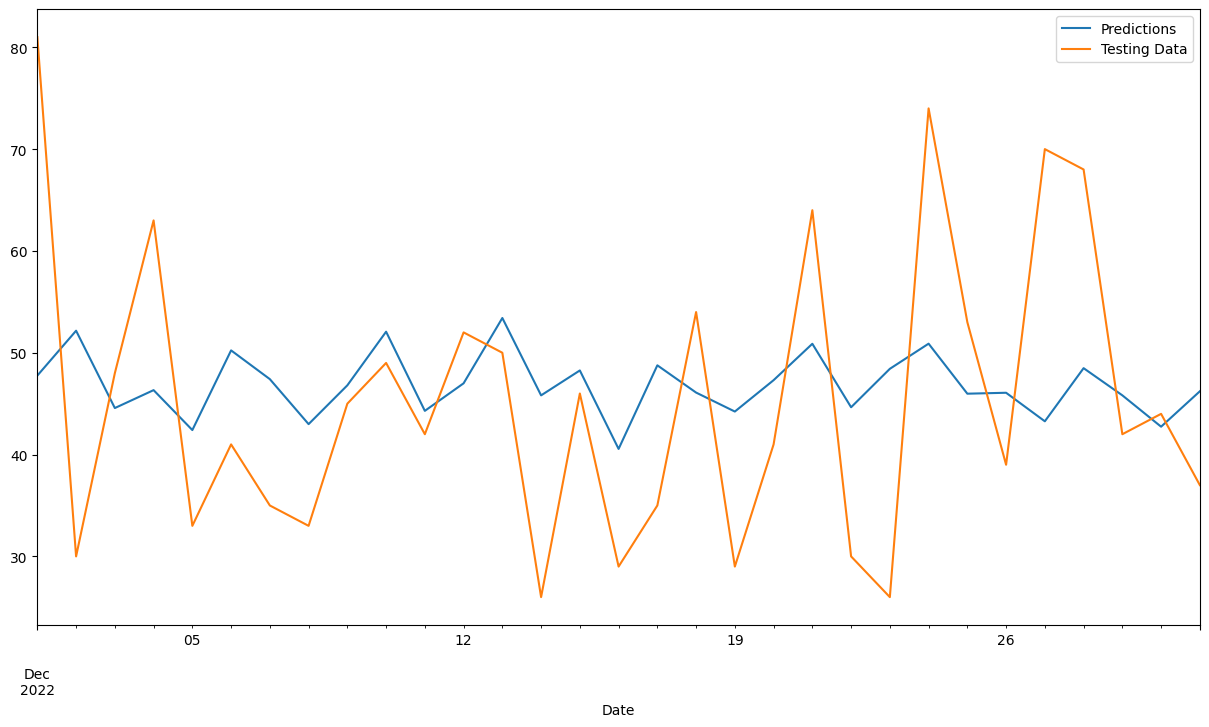

In [48]:
predictions.plot(legend=True, label = 'Predictions')
test['Qty'].plot(legend = True, label = 'Testing Data')
plt.show()

Predict Quantities Sold for Future Dates

In [49]:
pred = model.predict(start = len(data_qty), end = len(data_qty) + 30, typ = 'levels').rename('SARIMAX Predictions')
print(pred)

2023-01-01    52.922972
2023-01-02    43.097056
2023-01-03    47.720544
2023-01-04    52.077278
2023-01-05    45.312452
2023-01-06    46.060113
2023-01-07    41.529723
2023-01-08    48.984539
2023-01-09    45.572995
2023-01-10    43.724585
2023-01-11    46.621146
2023-01-12    51.957203
2023-01-13    43.428849
2023-01-14    47.250444
2023-01-15    51.678214
2023-01-16    44.892058
2023-01-17    46.039645
2023-01-18    41.426417
2023-01-19    48.611220
2023-01-20    45.701706
2023-01-21    43.039257
2023-01-22    46.249238
2023-01-23    51.674285
2023-01-24    43.169924
2023-01-25    46.970747
2023-01-26    51.597904
2023-01-27    44.736272
2023-01-28    45.974364
2023-01-29    41.053711
2023-01-30    48.347614
2023-01-31    45.432675
Freq: D, Name: SARIMAX Predictions, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Plotting Training, Testing Data, Predictions by SARIMAX, and SARIMAX Predictions on Future Dates

<Axes: xlabel='Date'>

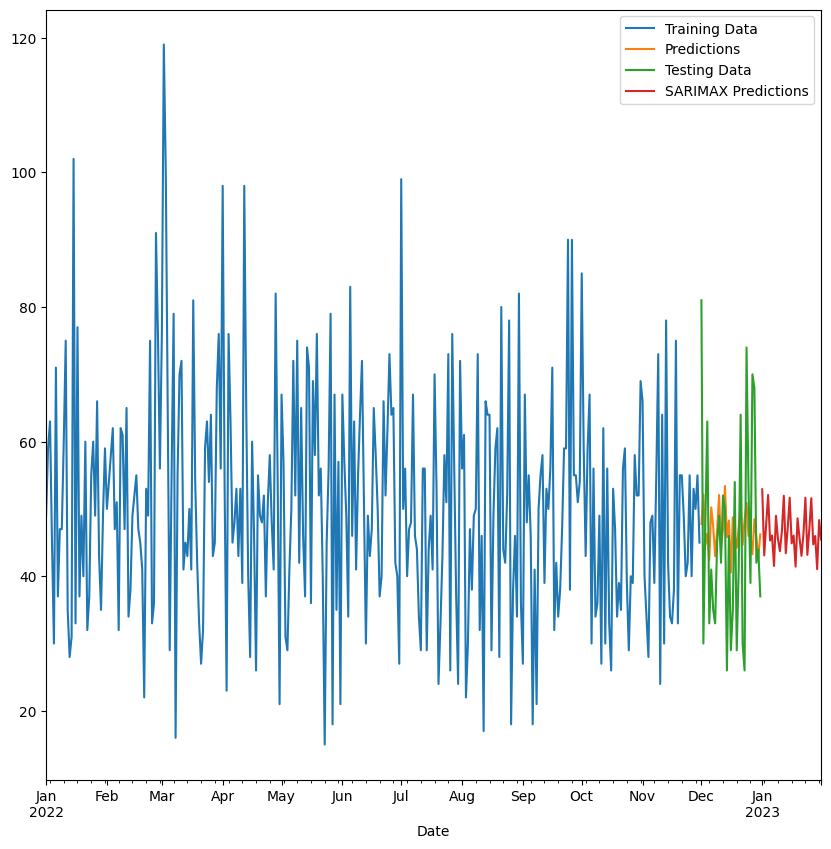

In [50]:
train['Qty'].plot(legend = True, label = 'Training Data', figsize = (10, 10))
predictions.plot(legend=True, label = 'Predictions')
test['Qty'].plot(legend = True, label = 'Testing Data')
pred.plot(legend = True)

CLUSTERING

Merging Data (Clustering)

In [51]:
data_clustering = pd.merge(left = transaction,
                  right = customer,
                  left_on = 'CustomerID',
                  right_on = 'CustomerID',
                  how = 'left')

In [52]:
data_clustering = pd.merge(left = data_clustering,
                  right = product,
                  left_on = ['ProductID', 'Price'],
                  right_on = ['ProductID', 'Price'],
                  how = 'left')

In [53]:
data_clustering = pd.merge(left = data_clustering,
                  right = store,
                  left_on = 'StoreID',
                  right_on = 'StoreID',
                  how = 'left')

In [54]:
data_clustering = data_clustering.drop_duplicates()

Renaming Columns

In [55]:
data_clustering.rename(columns = {"Product Name": "ProductName", "Marital Status": "MaritalStatus"}, inplace = True)
data_clustering.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,MaritalStatus,Income,ProductName,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.53,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
1,TR16356,165,2022-01-01,P9,10000,7,70000,1,44,1,Married,14.58,Yoghurt,Prima Tendean,Prima,Modern Trade,-6.200000,106.816666
2,TR1984,183,2022-01-01,P1,8800,4,35200,4,27,1,Single,0.18,Choco Bar,Gita Ginara,Gita,General Trade,-6.966667,110.416664
3,TR35256,160,2022-01-01,P1,8800,7,61600,4,48,1,Married,12.57,Choco Bar,Gita Ginara,Gita,General Trade,-6.966667,110.416664
4,TR41231,386,2022-01-01,P9,10000,1,10000,4,33,0,Married,6.95,Yoghurt,Gita Ginara,Gita,General Trade,-6.966667,110.416664


Data Aggregating (Clustering)

In [56]:
df = data_clustering.groupby('CustomerID').agg({'TransactionID':'count', 'Qty': 'sum', 'TotalAmount': 'sum'})

In [57]:
df

,TransactionID,Qty,TotalAmount
CustomerID,,,
1,17,60,623300
2,13,57,392300
3,15,56,446200
4,10,46,302500
5,7,27,268600
...,...,...,...
443,16,59,485100
444,18,62,577700
445,18,68,587200


Make Scatter Plot Based on the Aggregated Data

Text(0, 0.5, 'TotalAmount')

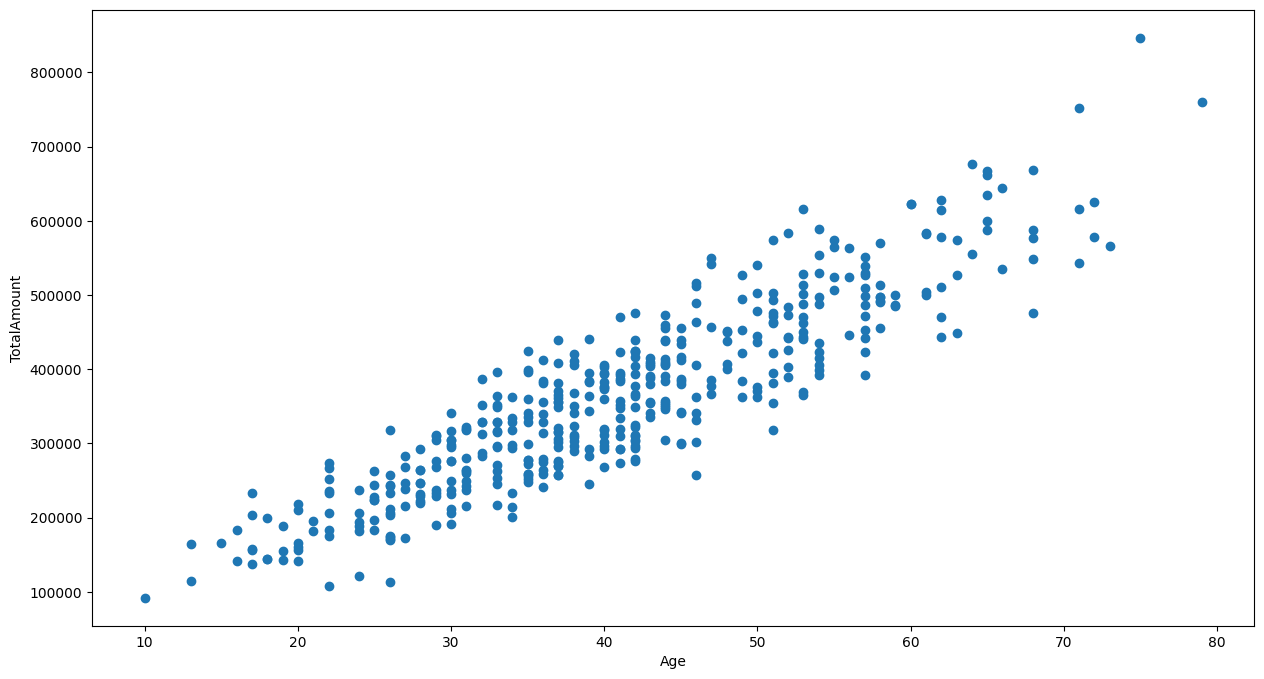

In [58]:
plt.scatter(df['Qty'],
            df['TotalAmount'])
plt.xlabel('Age')
plt.ylabel('TotalAmount')

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

Scale the Data

In [60]:
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)

Find the Right K (Clusters) Using Elbow Method

In [61]:
def find_clusters(df, max_K):
  clusters_centers = []
  k_values = []
  for k in range(1, max_K):
    kmeans_model = KMeans(n_clusters = k)
    kmeans_model.fit(df)
    clusters_centers.append(kmeans_model.inertia_)
    k_values.append(k)
  return clusters_centers, k_values
def generate_elbow_plot(clusters_centers, k_values):
  figure = plt.subplots(figsize = (10, 6))
  plt.plot(k_values, clusters_centers, 'o-', color = 'orange')
  plt.xlabel('Number of Clusters (K)')
  plt.ylabel('Cluster Inertia')
  plt.title('Elbow Plot of KMeans')
  plt.show()

In [62]:
clusters_centers, k_values = find_clusters(scaled_data, 12)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

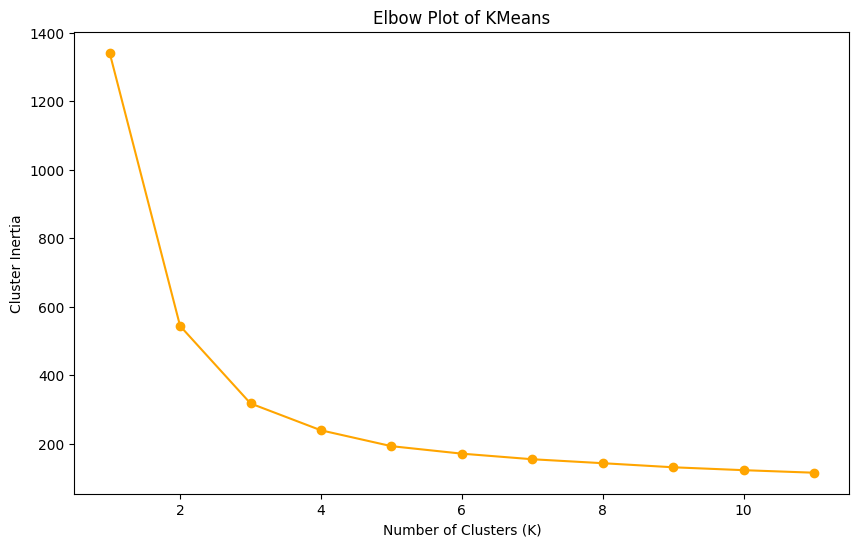

In [63]:
generate_elbow_plot(clusters_centers, k_values)

Model Fitting (Clustering)

In [64]:
kmeans_model = KMeans(n_clusters = 4)
kmeans_model.fit(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

Add 'Cluster' Column to df

In [65]:
df['Cluster'] = kmeans_model.labels_

In [66]:
df

,TransactionID,Qty,TotalAmount,Cluster
CustomerID,,,,
1,17,60,623300,3
2,13,57,392300,2
3,15,56,446200,2
4,10,46,302500,0
5,7,27,268600,1
...,...,...,...,...
443,16,59,485100,3
444,18,62,577700,3
445,18,68,587200,3


Visualize the Data and Based on Clusters

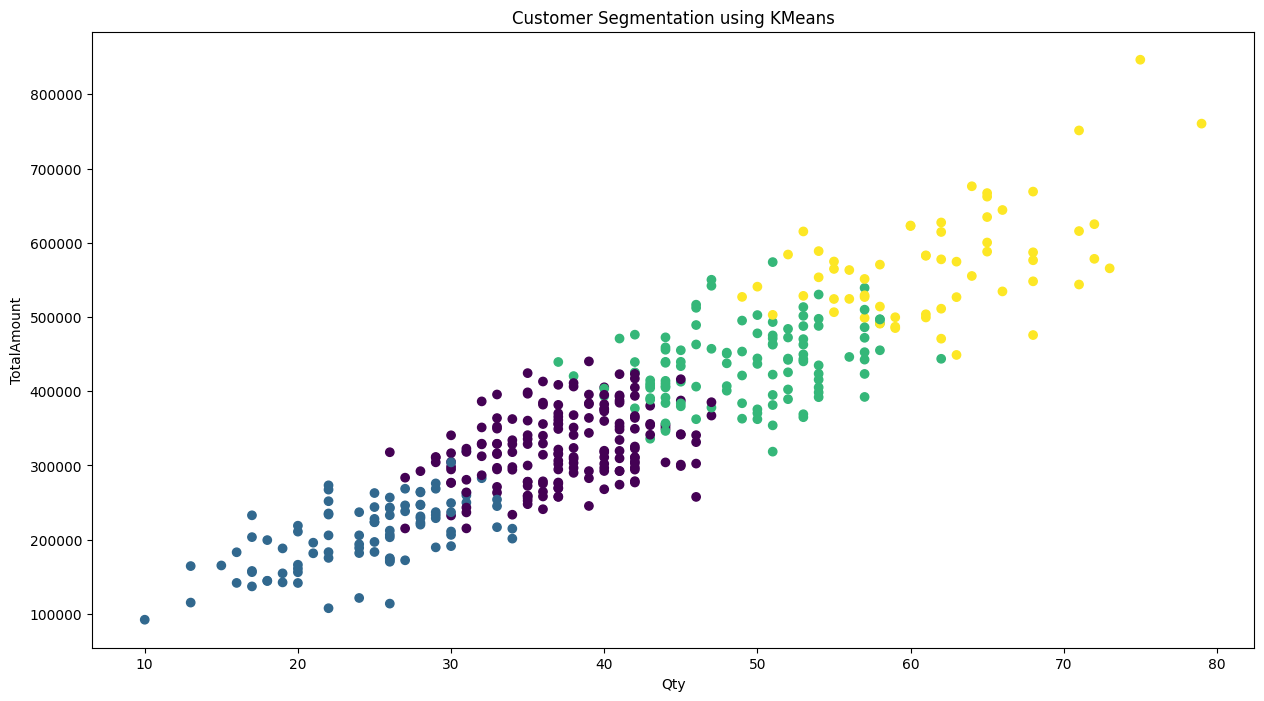

In [67]:
plt.scatter(df['Qty'],
            df['TotalAmount'],
            c = df['Cluster'])
plt.xlabel('Qty')
plt.ylabel('TotalAmount')
plt.title('Customer Segmentation using KMeans')
plt.show()